In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import glob
import os

from IPython.display import display

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

The following plot shows a series of traces on a HR diagram for a solar mass star, but with varying initial helium components (from 0.24 to 0.40). The inreased value of $Y$ results in the track moving up and left towards higher surface temperatures; the reasons for this are as follows:

* Higher He content means more energy is expended in the outer layers of the star ionising the He atoms, so opacity $\kappa$ increases.
    - Mean molecular weight ($\mu$) also increases
* To compensate and maintain equilibrium, stellar radius decreases, core temperature is increased and fuel is burnt more vigourously.
* This results in a hotter and brighter star, but additionally one with a reduced lifetime.

Also noticeable in the plot is the disappearence of the RGB bump as the He content increases to more extreme values.

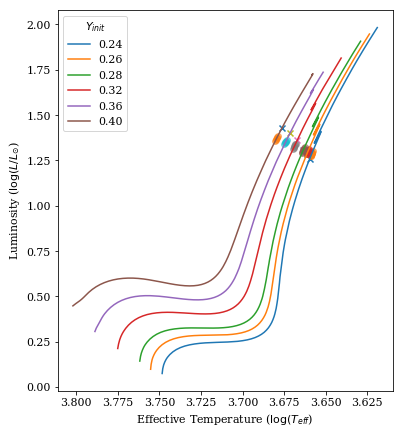

In [8]:
folder = "~/Documents/mesa/models/"
files = sorted(os.listdir('/home/daniel/Documents/mesa/models/'))
dfs = [pd.read_csv(folder+str(i), skiprows=5, delim_whitespace=True) for i in files]

plt.figure(1, figsize=(6,7))
for i in dfs:
    i = i.loc[(i.he_core_mass != 0.0)]
    plt.plot(i['log_Teff'], i['log_L'])
    plt.scatter(i.loc[(i.model_number == 1500)]['log_Teff'],
                i.loc[(i.model_number == 1500)]['log_L'], marker='x')
    plt.scatter(i.loc[(np.abs(i['log_R']-0.85) < 0.01)]['log_Teff'],
                i.loc[(np.abs(i['log_R']-0.85) < 0.01)]['log_L'], alpha=0.5)
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff}$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot}$)')
plt.legend(['0.24', '0.26', '0.28', '0.32', '0.36', '0.40'], title=r'$Y_{init}$')

plt.show()

Next, we can see how the frequencies of the $l=0$ oscillations change as a function of initial He ($Y$).

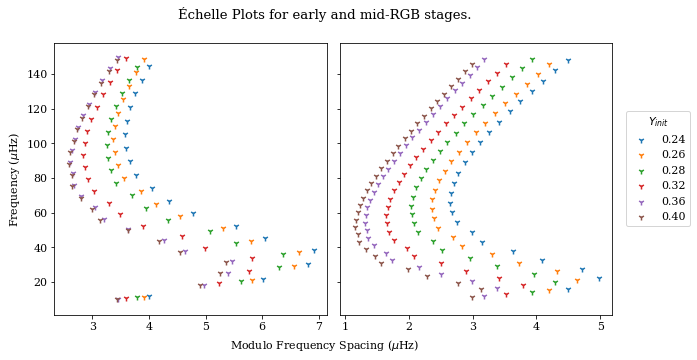

In [9]:
folder = "~/Documents/mesa/gyres/"
files = sorted(os.listdir('/home/daniel/Documents/mesa/gyres/'))
dgs = [pd.read_csv(folder+str(i), skiprows=5, delim_whitespace=True) for i in files]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharey=True)
for i,j in zip(dgs, range(len(files))):
    #plt.subplot(121)
    if str(files[j][16:17]) == '6':
        dnuavg = np.mean(np.diff(i['Re(freq)']))
        ax1.scatter(i['Re(freq)'] % dnuavg, i['Re(freq)'], marker='1')
    #plt.subplot(122)
    if str(files[j][16:17]) == '7':
        dnuavg = np.mean(np.diff(i['Re(freq)']))
        ax2.scatter(i['Re(freq)'] % dnuavg, i['Re(freq)'], marker='1')

fig.suptitle('Échelle Plots for early and mid-RGB stages.')        
fig.text(0.5, 0.03, r'Modulo Frequency Spacing ($\mu$Hz)', ha='center')
fig.subplots_adjust(wspace=0.05, hspace=0)
ax1.set_ylabel(r'Frequency ($\mu$Hz)')
plt.legend(['0.24', '0.26', '0.28', '0.32', '0.36', '0.40'], title=r'$Y_{init}$',
          bbox_to_anchor=(1.05, 0.75), loc=2, borderaxespad=0.)    
plt.show()    
#
#print(dnuavg)
#display(dg.head(10))



The two plots above roughly approximate to the early and mid-RGB (near RGB bump) phases of evolution. Perhaps the most importance difference between the two is the decrease in $\nu_{max}$ and $\Delta\nu$ as the star ages. This is a result of the star expanding in size, providing a larger acoustic cavity for sound to propagate through:

$$ \Delta\nu = \int_0^R \frac{1}{c} dr $$

Also noticeable is the effect of increasing the initial He percentage from a solar-like value to an extreme value of 40\%. Most significant is the shift to the left on the Échelle diagram - this corresponds to a change in the parameter $\epsilon$ in our helium glitch models.

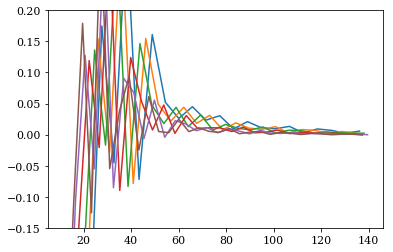

In [25]:
for i,j in zip(dgs, range(len(files))):
    if str(files[j][16:17]) == '7':
        f = i['Re(freq)']
        sdiff = np.diff(f,2)
        plt.plot(f[:-2],sdiff)
        plt.ylim(-0.15,0.2)